<a href="https://colab.research.google.com/github/pranitha2144/SignLanguagetoText/blob/main/Experiment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import tensorflow.keras as ks
sz=224

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#splitfolders.ratio('/content/drive/MyDrive/Major project- IV-II/dataset_combined', output="/content/drive/MyDrive/Major project- IV-II/Datasetcollecte", seed=1337, ratio=(.8, .2)) # default values

Copying files: 21816 files [1:59:00,  3.06 files/s]


In [2]:
# Initializing the CNN
classifier = Sequential()

In [3]:
# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer=ks.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


In [4]:
# Step 2 - Preparing the train/test data and training the model
classifier.summary()
# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Major project- IV-II/Datasetcollecte/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='rgb',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Major project- IV-II/Datasetcollecte/val',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='rgb',
                                            class_mode='categorical') 


Found 17442 images belonging to 27 classes.
Found 4374 images belonging to 27 classes.


In [7]:
hist=classifier.fit(
        training_set, # No of images in training set
        epochs=5,steps_per_epoch=5)

Epoch 1/5
5/5 [==============================] - 17s 3s/step - loss: 3.4899 - accuracy: 0.0200
Epoch 2/5
5/5 [==============================] - 15s 3s/step - loss: 3.3877 - accuracy: 0.0600
Epoch 3/5
5/5 [==============================] - 17s 3s/step - loss: 3.3633 - accuracy: 0.0400
Epoch 4/5
5/5 [==============================] - 17s 3s/step - loss: 3.2832 - accuracy: 0.0400
Epoch 5/5
5/5 [==============================] - 16s 3s/step - loss: 3.3509 - accuracy: 0.0600


KeyError: ignored

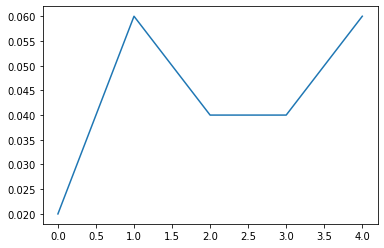

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
 
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

KeyError: ignored

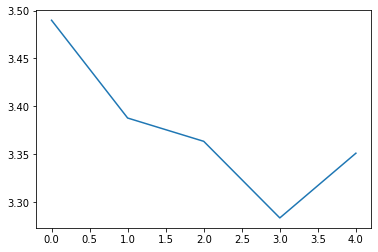

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [13]:
# Saving the model
classifier.save("/content/drive/MyDrive/Major project- IV-II/models/mymodel.h5")